In [11]:
import pandas as pd

In [12]:
train = pd.read_csv('../../input/final/train_final.csv').drop('Unnamed: 0', axis=1)
target = pd.read_csv('../../input/final/train_target_final.csv').drop('Unnamed: 0', axis=1).WnvPresent
test = pd.read_csv('../../input/final/test_final.csv').drop('Unnamed: 0', axis=1)

In [13]:
def write_csv(model_name, model):
    
    model_data = [item[1] for item in model.predict_proba(test)]
    
    pd.DataFrame(data=model_data).to_csv(model_name + '.csv')
    results = pd.read_csv(model_name + '.csv')
    results.columns = ['Id', 'WnvPresent']
    results.Id = results.Id.apply(lambda x : x + 1)
    results.to_csv(model_name + '.csv', index=False)

In [14]:
train.shape

(8603, 70)

In [15]:
test.shape

(116293, 70)

In [16]:
target.shape

(8603,)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 70 columns):
Lat                      8603 non-null float64
Long                     8603 non-null float64
AddressAccuracy          8603 non-null int64
Species_Fact             8603 non-null int64
Trap_Fact                8603 non-null int64
Date_Ord                 8603 non-null int64
Days_Since_Last_Check    8603 non-null int64
Spray_Factor             8603 non-null float64
TSRA                     8603 non-null int64
DZ                       8603 non-null int64
BR                       8603 non-null int64
BCFG                     8603 non-null int64
SN                       8603 non-null int64
VCFG                     8603 non-null int64
RA                       8603 non-null int64
HZ                       8603 non-null int64
VCTS                     8603 non-null int64
FU                       8603 non-null int64
FG+                      8603 non-null int64
MIFG                     8603 no

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 70 columns):
Lat                      116293 non-null float64
Long                     116293 non-null float64
AddressAccuracy          116293 non-null int64
Species_Fact             116293 non-null int64
Trap_Fact                116293 non-null int64
Date_Ord                 116293 non-null int64
Days_Since_Last_Check    116293 non-null int64
Spray_Factor             116293 non-null int64
TSRA                     116293 non-null int64
DZ                       116293 non-null int64
BR                       116293 non-null int64
BCFG                     116293 non-null int64
SN                       116293 non-null int64
VCFG                     116293 non-null int64
RA                       116293 non-null int64
HZ                       116293 non-null int64
VCTS                     116293 non-null int64
FU                       116293 non-null int64
FG+                      116293 non-nul

In [19]:
train = train.drop(['Temp_Wet_Bulb_both', 'StnPressure_both', 'Day Length'], axis=1)
test = test.drop(['Temp_Wet_Bulb_both', 'StnPressure_both', 'Day Length'], axis=1)

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
clf = RandomForestClassifier()

In [141]:
clf.fit(train, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [144]:
write_csv('randomforests', clf)

### XGBoost

In [83]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [84]:
etas = [0.01, 0.05, 0.08, 0.1, 0.12, 0.15, 0.18, 0.2]

In [85]:
xgb1 = XGBClassifier(learning_rate=0.2, seed=42, silent=1) # 0.2 best so far

In [86]:
xgb1.fit(train, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.25, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1)

In [87]:
print(xgb1.feature_importances_)

[ 0.14237288  0.14576271  0.00338983  0.06271186  0.11864407  0.06271186
  0.01694915  0.0779661   0.          0.00169492  0.00169492  0.          0.
  0.          0.          0.00338983  0.          0.          0.          0.
  0.          0.          0.          0.          0.00169492  0.01525424
  0.00847458  0.00847458  0.00169492  0.          0.          0.          0.
  0.01864407  0.05593221  0.          0.01016949  0.00508475  0.
  0.00169492  0.00847458  0.00508475  0.01186441  0.01694915  0.00338983
  0.00508475  0.01355932  0.01186441  0.01355932  0.01186441  0.01016949
  0.01864407  0.00847458  0.01355932  0.01355932  0.          0.00169492
  0.01016949  0.00508475  0.00508475  0.01525424  0.          0.00847458
  0.00169492  0.00847458  0.00508475  0.00847458]


In [88]:
from matplotlib import pyplot as plt

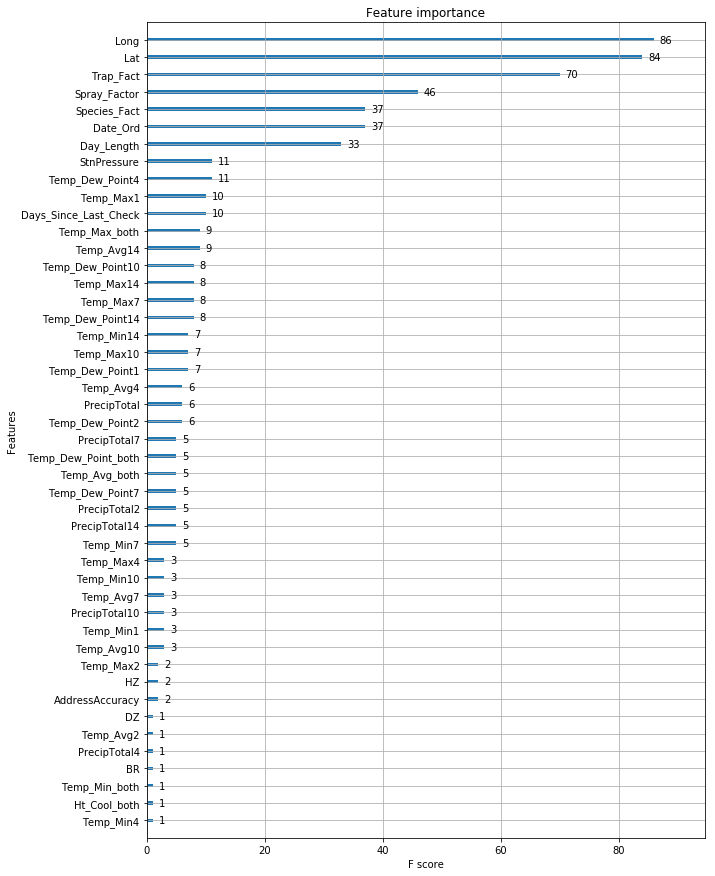

In [89]:
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(xgb1, ax=ax)
plt.show()

In [90]:
write_csv('xgboost', xgb1)

### Neural Net

In [415]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from keras import optimizers

In [416]:
X = train.values
y = target.values

In [417]:
model = Sequential()

In [418]:
model.add(Dense(32, input_shape=(train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(output_dim))
model.add(Activation('softmax'))

In [419]:
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy')

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [420]:
model.fit(X, y, epochs=100, batch_size=16)

Epoch 1/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 2/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 3/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 4/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 5/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 6/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 7/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 8/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 9/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 10/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 11/100
8603/8603 [=========================

KeyboardInterrupt: 

In [381]:
model_data = [item[0] for item in model.predict_proba(test.as_matrix())]
model_name = 'keras'

pd.DataFrame(data=model_data).to_csv(model_name + '.csv')
results = pd.read_csv(model_name + '.csv')
results.columns = ['Id', 'WnvPresent']
results.Id = results.Id.apply(lambda x : x + 1)
results.to_csv(model_name + '.csv', index=False)

111520/116293 [===========================>..] - ETA: 0s